# Importing dataset

In [185]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv("./ColonTumor/colonTumor.data",delimiter=',' ,header=None,)  #Importing the Data into a pandas dataframe

In [186]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


# Encoding classification labels

In [187]:
def convert(x):
    if x == "negative":                # Assigning 0 if the class label is negative
        return 0
    else:                              # Assigning 1 if the class label is positive 
        return 1

In [188]:
df[2000] = map(lambda x: convert(x), df[2000])

In [189]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


In [190]:
print df[2000].value_counts()      # We have only 22 positive examples out of the total 62 samples.

0    40
1    22
Name: 2000, dtype: int64


# Splitting the data into training set and test set

In [191]:
# Let's assign the features and labels to different objects.
y = np.array(df[2000])
X = np.array(df.drop(2000, axis=1))

In [192]:
# Let's split the data into train and test set, we will keep only 10% for testing since the amount of data is small. 
# Later we will use cross validation on the training set to get better estimates of error. 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0, stratify=y)

# Normalizing the data

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [194]:
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Transforming the features to a lower dimension with PCA

[]

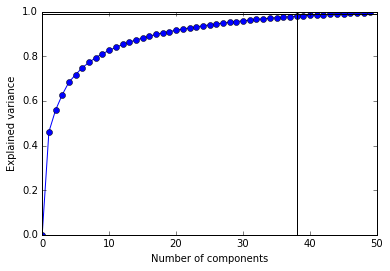

In [270]:
from sklearn.decomposition import PCA
components = [i for i in range(50)]
explained_variance = []

for component in components:
    pca = PCA(n_components=component)
    pca.fit(X_train_normalized)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(components, explained_variance, marker='o')
plt.axhline(0.99, color='black')
plt.axvline(38, color='black')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.plot()

So, looks like with 38 principal components we are retaining 97.92% of variance in the data. 

In [278]:
pca = PCA(n_components=38)
X_train_normalized_pca = pca.fit_transform(X_train_normalized)

In [279]:
print np.sum(pca.explained_variance_ratio_)

0.979216702958


In [280]:
X_test_normalized_pca = pca.transform(X_test_normalized)

# i) Logistic regression model

In [400]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(y_train, n_folds=5)   # Running k-fold cross validation with 5 folds 
best_lr_model = None                        # Objects which will keep the best model after all the iterations
max_cv_accuracy = 0.0                       # Max cv accuracy reported by the classifier
choices_regularization_param = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24] # Choices for lambda 
dict_performance_lr = {}                       # Dictionary to keep auc score for each value of lambda 

for lambda_ in choices_regularization_param:
    current_auc_score = []
    for train_index, test_index in skf:     # Using l2 penalty for regularization for preventing overfitting. 
        clf = LogisticRegression(C=lambda_, penalty='l2', n_jobs=2, random_state=0)
        clf.fit(X_train_normalized_pca[train_index], y_train[train_index])
        y_pred = clf.predict(X_train_normalized_pca[test_index])
        current_auc_score.append(roc_auc_score(y_train[test_index], y_pred))
    
    dict_performance_lr[lambda_] = [np.mean(current_auc_score), np.std(current_auc_score)]
    if np.mean(current_auc_score) > max_cv_accuracy:
        max_cv_accuracy = np.mean(current_auc_score)
        best_lr_model = clf

In [401]:
lr_performance = pd.DataFrame([[x[0], x[1][0], x[1][1]] for x in dict_performance_lr.items()], \
                             columns=["lambda", "Mean", "Std"])
lr_performance.sort_values(by=['Mean'], ascending=[0])

,lambda,Mean,Std
2,0.01,0.817857,0.090633
3,0.02,0.760714,0.081127
0,0.32,0.710714,0.109731
5,0.64,0.710714,0.109731
1,0.16,0.696429,0.119523
4,0.04,0.696429,0.119523
10,0.08,0.696429,0.119523
6,1.28,0.671429,0.148805
7,2.56,0.671429,0.148805
8,5.12,0.671429,0.148805


In [402]:
best_lr_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [403]:
pred_test = best_lr_model.predict(X_test_normalized_pca)

In [404]:
y_test

array([0, 0, 1, 1, 0, 0, 0])

In [405]:
from sklearn.metrics import accuracy_score
print roc_auc_score(y_test, pred_test)        # AUC score on test data 
print accuracy_score(y_test, pred_test)

1.0
1.0


# ii) Support Vector Machines

In [406]:
from sklearn import svm
from sklearn.svm import SVC

skf = StratifiedKFold(y_train, n_folds=5)                            # Running k-fold cross validation with 5 folds 
C_params = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24] # Choices of the regularization param 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']                       # Choices of kernels. 
best_svm_model = None                                                # Best Model after training 
max_cv_accuracy = 0.0                                                # Max average cross validation score. 
dict_performance_svm = {}

for c in C_params:
    for kernel_ in kernels:
        current_auc_score = []
        for train_index, test_index in skf:     
            clf = SVC(C=c, kernel=kernel_, random_state=0)
            clf.fit(X_train_normalized_pca[train_index], y_train[train_index])
            y_pred = clf.predict(X_train_normalized_pca[test_index])
            current_auc_score.append(roc_auc_score(y_train[test_index], y_pred))
            
        dict_performance_svm[(c, kernel_)] = [np.mean(current_auc_score), np.std(current_auc_score)]
        if np.mean(current_auc_score) > max_cv_accuracy:
            max_cv_accuracy = np.mean(current_auc_score)
            best_svm_model = clf

In [407]:
svm_performance = pd.DataFrame([[x[0][0], x[0][1], x[1][0], x[1][1]] for x in dict_performance_svm.items()], \
                             columns=["C", "Kernel", "Mean", "Std"])
svm_performance.sort_values(by=['Mean'], ascending=[0])

,C,Kernel,Mean,Std
1,0.01,linear,0.767857,0.163663
8,0.02,linear,0.757143,0.124540
22,0.32,linear,0.742857,0.096890
17,0.64,linear,0.742857,0.096890
39,0.04,linear,0.742857,0.096890
3,1.28,linear,0.742857,0.096890
38,0.16,linear,0.742857,0.096890
5,2.56,linear,0.742857,0.096890
32,10.24,linear,0.742857,0.096890
26,0.08,linear,0.742857,0.096890


In [408]:
best_svm_model

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [409]:
pred_test_svm = best_svm_model.predict(X_test_normalized_pca)

In [410]:
print roc_auc_score(y_test, pred_test_svm)        # Auc score on Test set
print accuracy_score(y_test, pred_test_svm)       

0.75
0.857142857143


# Ensemble methods - Random forest classifier

In [417]:
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(y_train, n_folds=5)   # Running k-fold cross validation with 5 folds 
best_rf_model = None                        # Objects which will keep the best model after all the iterations
max_cv_accuracy = 0.0                       # Max cv accuracy reported by the classifier
number_of_estimators = [5, 10, 20, 30, 50, 100, 200] # Choices for number of trees  
dict_performance_rf = {}                       # Dictionary to keep AUC score for each value of n_estimator

for n_tree_ in number_of_estimators:
    current_auc_score = [] 
    for train_index, test_index in skf:     # Using l2 penalty for regularization for preventing overfitting. 
        clf = RandomForestClassifier(n_estimators=n_tree_, random_state=0)
        clf.fit(X_train_normalized_pca[train_index], y_train[train_index])
        y_pred = clf.predict(X_train_normalized_pca[test_index])
        current_auc_score.append(roc_auc_score(y_train[test_index], y_pred))
    
    dict_performance_rf[n_tree_] = [np.mean(current_auc_score), np.std(current_auc_score)]
    if np.mean(current_auc_score) > max_cv_accuracy:
        max_cv_accuracy = np.mean(current_auc_score)
        best_rf_model = clf

In [418]:
best_rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [419]:
rf_performance = pd.DataFrame([[x[0], x[1][0], x[1][1]] for x in dict_performance_rf.items()], \
                             columns=["Number of trees", "Mean", "Std"])
rf_performance.sort_values(by=['Mean'], ascending=[0])

,Number of trees,Mean,Std
1,5,0.675000,0.102519
5,20,0.657143,0.083299
3,10,0.653571,0.091473
2,200,0.635714,0.101393
4,50,0.621429,0.088497
6,30,0.617857,0.065465
0,100,0.610714,0.084061


In [420]:
pred_test_rf = best_rf_model.predict(X_test_normalized_pca)

In [421]:
pred_test_rf

array([1, 0, 1, 1, 0, 0, 0])

In [422]:
print roc_auc_score(y_test, pred_test_rf)        # AUC score on test data 
print accuracy_score(y_test, pred_test_rf)       # Accuracy of the classifier 

0.9
0.857142857143
